# Basis Handling

We talk about how to switch between site and energy basis.

## Default basis

By default, GRANAD uses the site basis. You can explicitly force a quantity to be given in energy basis by appending "_e" to it.

In [1]:
import jax.numpy as jnp
from granad import MaterialCatalog

chain  = MaterialCatalog.get("metal_1d")
flake = chain.cut_flake( unit_cells = 10 )
site_occupations = flake.initial_density_matrix.diagonal() # site basis
energy_occupations = flake.initial_density_matrix_e.diagonal() # energy basis

Additionally, should you be unsure, the site basis is always given by appending "_x".

In [2]:
print(jnp.all(flake.initial_density_matrix_x == flake.initial_density_matrix))

True


There is also a built-in function for basis transformation

In [3]:
print(jnp.all(flake.transform_to_energy_basis(flake.hamiltonian) == flake.hamiltonian_e))

True


This is usually only useful when transforming arrays of density matrices, because they are just returned from an orbital list and don't belong to its attributes, so you can't simply append _e.

Displaying transition dipole moments

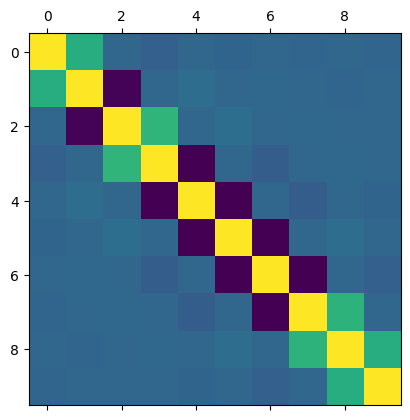

In [4]:
import matplotlib.pyplot as plt
plt.matshow(flake.dipole_operator_e[0].real)
plt.show()